# Содержание <a class="anchor" id="begining"></a>

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание-" data-toc-modified-id="Содержание--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Содержание <a class="anchor" id="begining" rel="nofollow"></a></a></span></li><li><span><a href="#Стратегия-удержания-клиентов-в-сети-фитнес-центров" data-toc-modified-id="Стратегия-удержания-клиентов-в-сети-фитнес-центров-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Стратегия удержания клиентов в сети фитнес-центров</a></span></li><li><span><a href="#Обзор-и-подготовка-данных-для-анализа" data-toc-modified-id="Обзор-и-подготовка-данных-для-анализа-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обзор и подготовка данных для анализа</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоги исследования</a></span></li><li><span><a href="#Общие-выводы-и--базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Общие-выводы-и--базовые-рекомендации-по-работе-с-клиентами-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общие выводы и  базовые рекомендации по работе с клиентами</a></span></li></ul></div>

# Стратегия удержания клиентов в сети фитнес-центров

[К содержанию](#begining)

**Цель** - подготовить план действий по удержанию клиентов. Критерий оттока: можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.


**Задачи**:

* научиться прогнозировать вероятность оттока;
* сформировать типичные портреты клиентов;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.

**Ход исследования**
 
 Исследование пройдёт в пять этапов:
 1. Обзор и подготовка данных для анализа
 2. Исследовательский анализ данных 
 3. Построение модели прогнозирования оттока клиентов
 4. Кластеризация клиентов
 5. Формулировка выводов и рекомендаций для стратегии взаимодействия с клиентами и их удержания

# Обзор и подготовка данных для анализа

## Изучение данных из файла

[К содержанию](#begining)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

Предварительно ознакомимся с данными из таблицы

In [2]:
df = pd.read_csv('gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**Описание данных**


**Данные клиента за предыдущий до проверки факта оттока месяц:**


`gender` — пол;

`Near_Location` — проживание или работа в районе, где находится фитнес-центр;

`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

`Phone` — наличие контактного телефона;

`Age` — возраст;

`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).



**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**


`Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);

`Group_visits` — факт посещения групповых занятий;

`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;

`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;

`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, 
косметический и массажный салон.

`Churn` — факт оттока в текущем месяце.

In [5]:
# Для удобства приведем названия столбцов к нижнему регистру 
for col in df.columns:
    df.rename(columns={col: col.lower()}, inplace=True)

In [6]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
# Проверка на явные дубликаты
df.duplicated().sum()

0

Так как в дальнейшем в рамках исследования будет использована логистическая регрессия, необходимо также учитывать возможные выбросы. В линейных моделях выбросы могут серьёзно «перетянуть» зависимость на себя, поэтому  проверим датасет на их наличие. 

In [8]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Большинство признаков в датасете - категориальные, поэтому особое внимание уделим лишь столбцу `Avg_additional_charges_total`. Видим, что максимальное значение средней выручки от других услуг фитнес-центра почти в 4 раза превышает среднее и медиану. Стандартное отклонение также значительно.  Для того чтобы  выбросы не повлияли на точность наших моделей, удалим из датафрейма 5% самых экстремальных значений.

In [9]:
# расчитаем пороговое значение для определения выбросов на уровне 95 перцентиля
threshold = np.percentile(df.avg_additional_charges_total, 95)
threshold

323.44087589030966

In [10]:
df = df.query('avg_additional_charges_total < @threshold')
df.reset_index(inplace=True, drop=True)

## Вывод

[К содержанию](#begining)

Предварительно можно утверждать, что в данных отсутствуют серьезные проблемы. Пропуски и дубликаты не обнаружены, категориальные переменные уже преобразованы в числовые значения. Также была проведена работы с выбросами, по итогам которой из датафрейма были удалены 5% самых экстремальных значений, помимо этого названия столбцов приведены к нижнему регистру    

# Исследовательский анализ данных

Еще раз посмотрим на 

[К содержанию](#begining)

In [11]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,0.512368,0.843947,0.484474,0.307368,0.902632,4.615789,0.408947,29.135263,135.091534,4.261579,3.693947,1.873166,1.755652,0.277368
std,0.499913,0.362953,0.499825,0.461464,0.296498,4.524190,0.491704,3.263560,82.802363,4.162657,3.765328,0.961989,1.045992,0.447759
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,65.673511,1.000000,1.000000,1.183569,0.960651,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,129.427059,1.000000,3.000000,1.825900,1.708365,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,198.232599,6.000000,5.000000,2.518070,2.491912,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,323.435990,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрим насколько различаются средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. 


В силу того, что в таблице присутствует много категориальным переменных с бинарной классификацией (0, 1) бОльшее среднее значение такого признака будет говорить о его бОльшей распространенности среди данной группы 

In [12]:
# группируем исходную таблицу по столбу churn
grouped = df.groupby('churn', as_index=False).mean()
grouped

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.512746,0.873270,0.533867,0.355426,0.902768,5.723962,0.462127,29.960306,143.385926,5.258922,4.732702,2.025969,2.028266
1,1,0.511385,0.767552,0.355787,0.182163,0.902277,1.728653,0.270398,26.985769,113.482046,1.663188,0.987666,1.475065,1.045408


Прежде чем делать какие-либо выводы на основе данной таблицы, визуализируем общие данные по тем кто ушел и тем, кто остался в разбивке по различным признакам. Для категориальных признаков построим столбчатые диаграммы, а для числовых - гистограммы распределения. 

In [13]:
# список столбцов с категориальными признаками (исключая "churn")
cat = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']

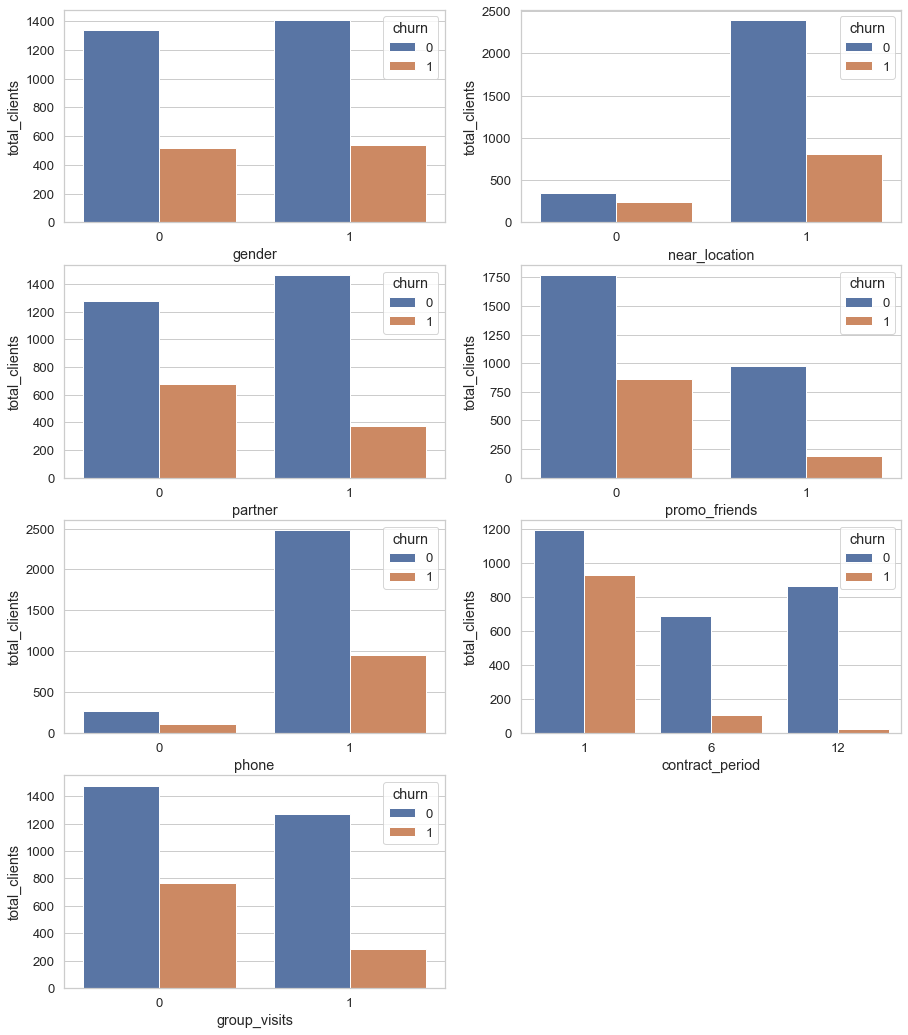

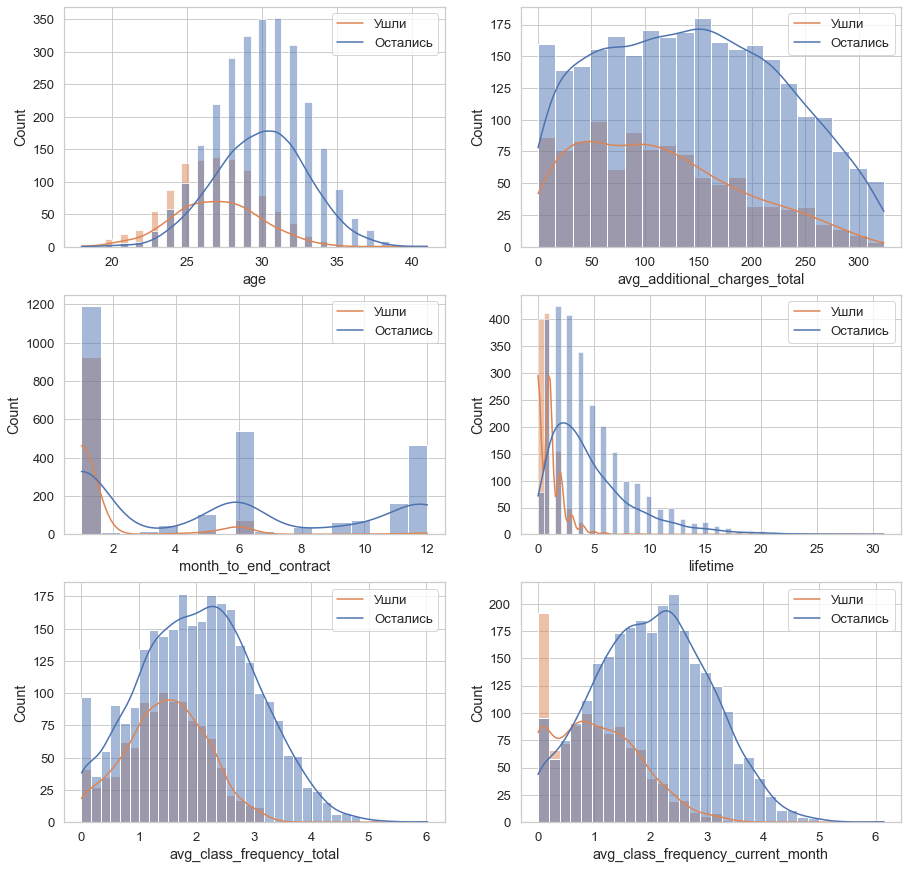

In [14]:
# Строим соответствующие графики для категориальных признаков
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 18))
n = 1
for col in df.columns:
    if col in cat:
        plot = df.groupby([col, 'churn'], as_index=False).agg({'age':'count'})
        plot.rename(columns={'age':'total_clients'}, inplace=True)
        plt.subplot(4, 2, n)
        sns.barplot(data=plot, x=col, y='total_clients', hue='churn')
        n += 1
plt.show()

# Строим соответствующие графики для числовых признаков
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(15, 15))
n = 1
for col in df.columns[:-1]:
    if col not in cat and n <= 6:
        plt.subplot(3, 2, n)
        sns.histplot(data=df, x=col, hue='churn', kde=True)
        plt.legend(labels=['Ушли', 'Остались'])
        n += 1
plt.show()

**Предварительно, можно сделать следующие выводы:**

* пол клиента и наличие контактного телефона не влияет на вероятность оттока;
* среди тех, кто ушел, чуть большее количество тех, кто жил далеко от фитнес центра;
* если клиент - сотрудник компании-партнёра клуба или же использовал промо-код от знакомого при оплате первого абонемента, то это несколько снижает вероятность оттока;
* чем больше длительность текущего действующего абонемента - тем менее вероятен уход клиента;
* посещение групповых занятий повышает вероятность того, что клиент отсанется с нами;
* средний возраст ушедших клиентов несколько ниже, чем тех, кто остался;
* ушедшие клиенты реже тратили деньги на прочие услуги фитнес центра;
* клиенты чаще уходят, когда срок действия их абонимента подходит к концу;
* в целом, чем дольше с нами клиент, тем меньше вероятность его ухода;
* чем чаще клиент посещает фитнес центр, тем менее вероятен его уход;




Дополнительно построим матрицу корреляций и посмотрим, есть в датафрейме ли признаки, которые могут быть взаимосвязаны между собой. 

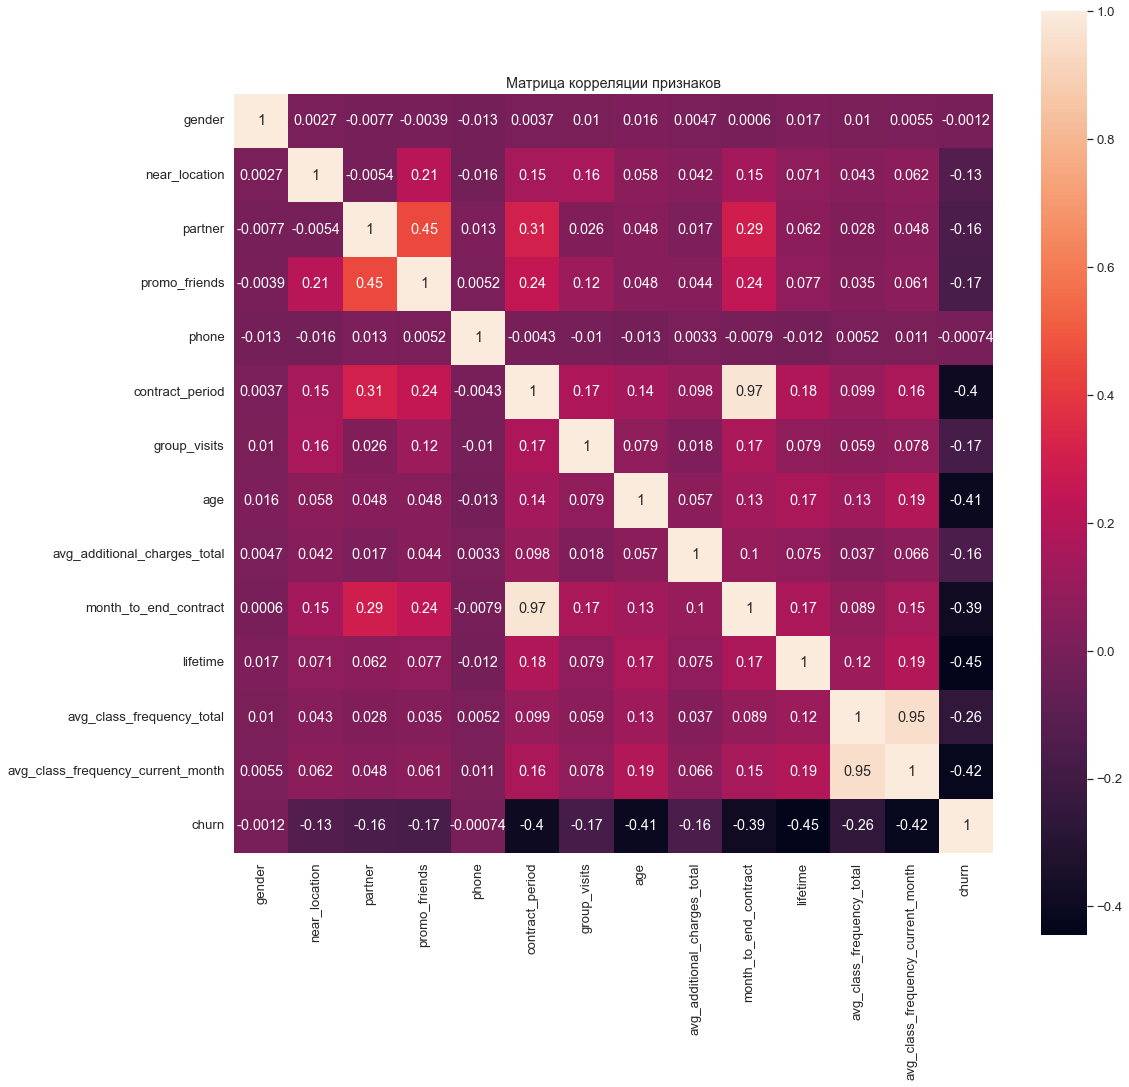

In [15]:
plt.figure(figsize=(17, 17))
plt.title('Матрица корреляции признаков')
sns.heatmap(df.corr(), square=True, annot=True);

**Наибольшую корреляцию между собой показывают следующие пары признаков:** 

* `avg_class_frequency_current_month` и `avg_class_frequency_total`;
* `contract_period` и `month_to_end_contract`;
* `promo_friends и partner`.


**интересующий нас в первую очередь признак `churn` лучше всего коррелирует со следующими признаками** - 


`lifetime`, `age`, `avg_class_frequency_current_month`, `month_to_end_contract`, `contract_period`, что в целом согласуется с озвученными выше выводами

## Вывод

[К содержанию](#begining)

**По итогам исследовательского анализа данных можно выдвинуть следующие преположения, связанные с оттоком клиентов:**

* пол клиента и наличие контактного телефона не влияет на вероятность оттока;
* среди тех, кто ушел, чуть большее количество тех, кто жил далеко от фитнес центра;
* если клиент - сотрудник компании-партнёра клуба или же использовал промо-код от знакомого при оплате первого абонемента, то это несколько снижает вероятность оттока;
* чем больше длительность текущего действующего абонемента - тем менее вероятен уход клиента;
* посещение групповых занятий повышает вероятность того, что клиент отсанется с нами;
* средний возраст ушедших клиентов несколько ниже, чем тех, кто остался;
* ушедшие клиенты реже тратили деньги на прочие услуги фитнес центра;
* клиенты чаще уходят, когда срок действия их абонимента подходит к концу;
* в целом, чем дольше с нами клиент, тем меньше вероятность его ухода;
* чем чаще клиент посещает фитнес центр, тем менее вероятен его уход.


**При этом согласно матрице корреляций, отток клиентов лучше всего коррелирует со следующими признаками** - 


`lifetime`, `age`, `avg_class_frequency_current_month`, `month_to_end_contract`, `contract_period`.

# Построение модели прогнозирования оттока клиентов

[К содержанию](#begining)

Для того, чтобы научиться  прогнозировать вероятность оттока и  проверить насколько выводы из EDA соответствуют положению вещей, построим модель бинарной классификации клиентов, где целевым признаком будет являться факт оттока клиента в следующем месяце


В качестве алгоритмов для обучения модели используем логистическую регрессию и случайный лес. 

In [16]:
# разделяем датафрейм на целевую переменную и обучающие признаки
y = df.churn
X = df.drop(['churn'], axis=1)

In [17]:
# Разделение выборки на тренировочную и валидационную
# размер валидационной выборки - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# стандартизируем матрицу признаков для обучающей и валидационной выборки
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [19]:
# создадим функцию, которая принимает на вход модель и данные, делает прогноз и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'ACC:{:.2f} PRE:{:.2f} REC:{:.2f} F1:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred)
        ))

In [20]:
# список моделей для обучения
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

In [21]:
for model in models:
    print(model)
    make_prediction(model, X_train_st, y_train, X_test_st, y_test)
    print()

LogisticRegression(random_state=0)
ACC:0.93 PRE:0.87 REC:0.86 F1:0.87

RandomForestClassifier(random_state=0)
ACC:0.93 PRE:0.89 REC:0.83 F1:0.86



In [22]:
# проверяем баланс классов
df.churn.value_counts()

0    2746
1    1054
Name: churn, dtype: int64

Учитывая явный дисбаланс классов, метрика accuracy не достаточно хорошо отражает истинную прогностическую способность наших моделей. 

Поэтому в нашем случае лучше принять во внимание другие метрики, которые не привязаны к соотношению классов - precision и recall. 


Каждое ложное срабатывание не стоит нам особых ресурсов ресурсов, т.е. нектирично, если модель перестраховывается. Нам важно, сколько реальных клинтов, склонных к оттоку, мы смогли обнаружить, поэтому ключевая метрика для нас - это recall.


На основании данной метрики, можно утверждать, что лучше всего показала себя модель логистической регрессии. К тому же  F1 мера - которая является сводной метрикой, учитывающая баланс между precision и recall, также говорит в пользу данной модели.  

In [23]:
# еще раз раз обучим модель и посмотрим, какие признаки имеют в ней наибольший вес
model = LogisticRegression(random_state=0)
model.fit(X_train_st, y_train)
model.predict(X_test_st)
model.coef_
pd.DataFrame({'feature': X_train.columns,
             'coef': [abs(i) for i in model.coef_[0]]}).sort_values(by='coef', ascending=False)

,feature,coef
12,avg_class_frequency_current_month,4.303063
10,lifetime,3.554007
11,avg_class_frequency_total,3.245541
7,age,1.139582
9,month_to_end_contract,0.757696
5,contract_period,0.454265
8,avg_additional_charges_total,0.446079
6,group_visits,0.440146
3,promo_friends,0.229247
2,partner,0.089560


Согласно модели логистической регрессии, наибольший вклад в сохранение пользователей вносят такие признаки как:
* средняя частота посещений в неделю за предыдущий месяц;
* время с момента первого обращения в фитнес-центр;
* средняя частота посещений в неделю за все время;
* возраст;
* длительность абонемента;
* расходы на доп. услуги;
* посещение групповых занятий.


Напротив, практически никак не влияют на итоговый исход - пол, наличие контактного телефона и проживание рядом с фитнес-центром (чтонесколько неожиданно)

## Вывод

[К содержанию](#begining)

По итогам сравнения метрик двух обученных моделей, можно утверждать, что лучше всего показала себя модель логистической регрессии. Именно у нее лучше ключевая для нас метрика - recall.


На основании данной модели была сформирована таблица весов признаков, которая показала, что наибольшее влияние на сохранение/отток клиентов оказывают следующие признаки:

* средняя частота посещений в неделю за предыдущий месяц;
* время с момента первого обращения в фитнес-центр;
* средняя частота посещений в неделю за все время;
* возраст. 



# Кластеризация клиентов

[К содержанию](#begining)

В дополнение к поиску наиболее значимых признаков, ведущих к оттоку, также проведем кластеризацию клиентов - посмотрим, есть ли различие по доле оттока между различными сегментами посетителей фитнес центра. 

In [24]:
# для начала вновь стандартизируем единую матрицу признаков
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Чтобы понять, какое количество кластеров можно выделить, нарисуем дендрограмму на стандартизованной матрице признаков

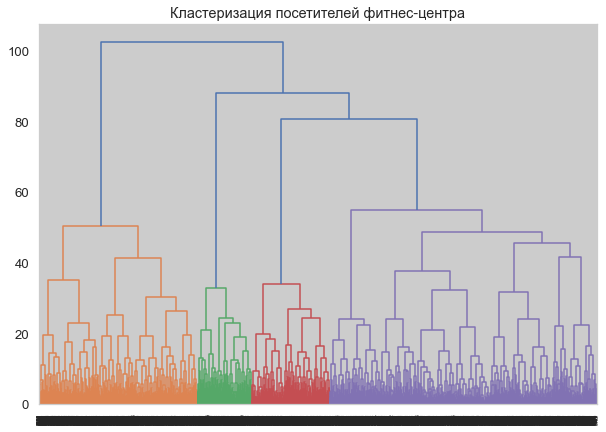

In [25]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Кластеризация посетителей фитнес-центра')
plt.show()

Оптимальным числом кластеров будем считать 5

In [26]:
# обучаем модель кластеризации на основании алгоритма K-Means 
# и прогнозируем кластеры клиентов
km = KMeans(n_clusters=5)
labels = km.fit_predict(X_sc)

In [27]:
# добавляем в исходную таблицу новый столбец с кластерами клиентов
df['clusters'] = labels

Посмотрим насколько различаются средние значения признаков в разных кластерах. Для этого посмотрим на средние значения и распределение признаков для кластеров. 

В силу того, что в таблице присутствует много категориальным переменных с бинарной классификацией (0, 1) бОльшее среднее значение такого признака будет говорить о его бОльшей распространенности среди данного кластера

In [28]:
# группируем исходную таблицу по кластерам
df.groupby('clusters').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clusters,,,,,,,,,,,,,,
0,0.500000,0.000000,0.460744,0.078512,1.0,2.270661,0.212810,28.415289,126.277750,2.130165,2.793388,1.661313,1.472192,0.460744
1,0.485950,1.000000,0.348760,0.233058,1.0,1.956198,0.338017,28.141322,127.009051,1.866942,2.408264,1.244250,1.002305,0.526446
2,0.505274,0.956751,0.777426,0.570675,1.0,10.873418,0.544304,29.956751,146.428200,9.919831,4.808017,1.990294,1.982282,0.029536
3,0.532432,0.862162,0.464865,0.300000,0.0,4.675676,0.424324,29.267568,134.265964,4.362162,3.832432,1.857843,1.721647,0.278378
4,0.559645,0.978426,0.364213,0.248731,1.0,2.583756,0.468274,30.053299,139.665111,2.393401,4.815990,2.835294,2.829866,0.079949


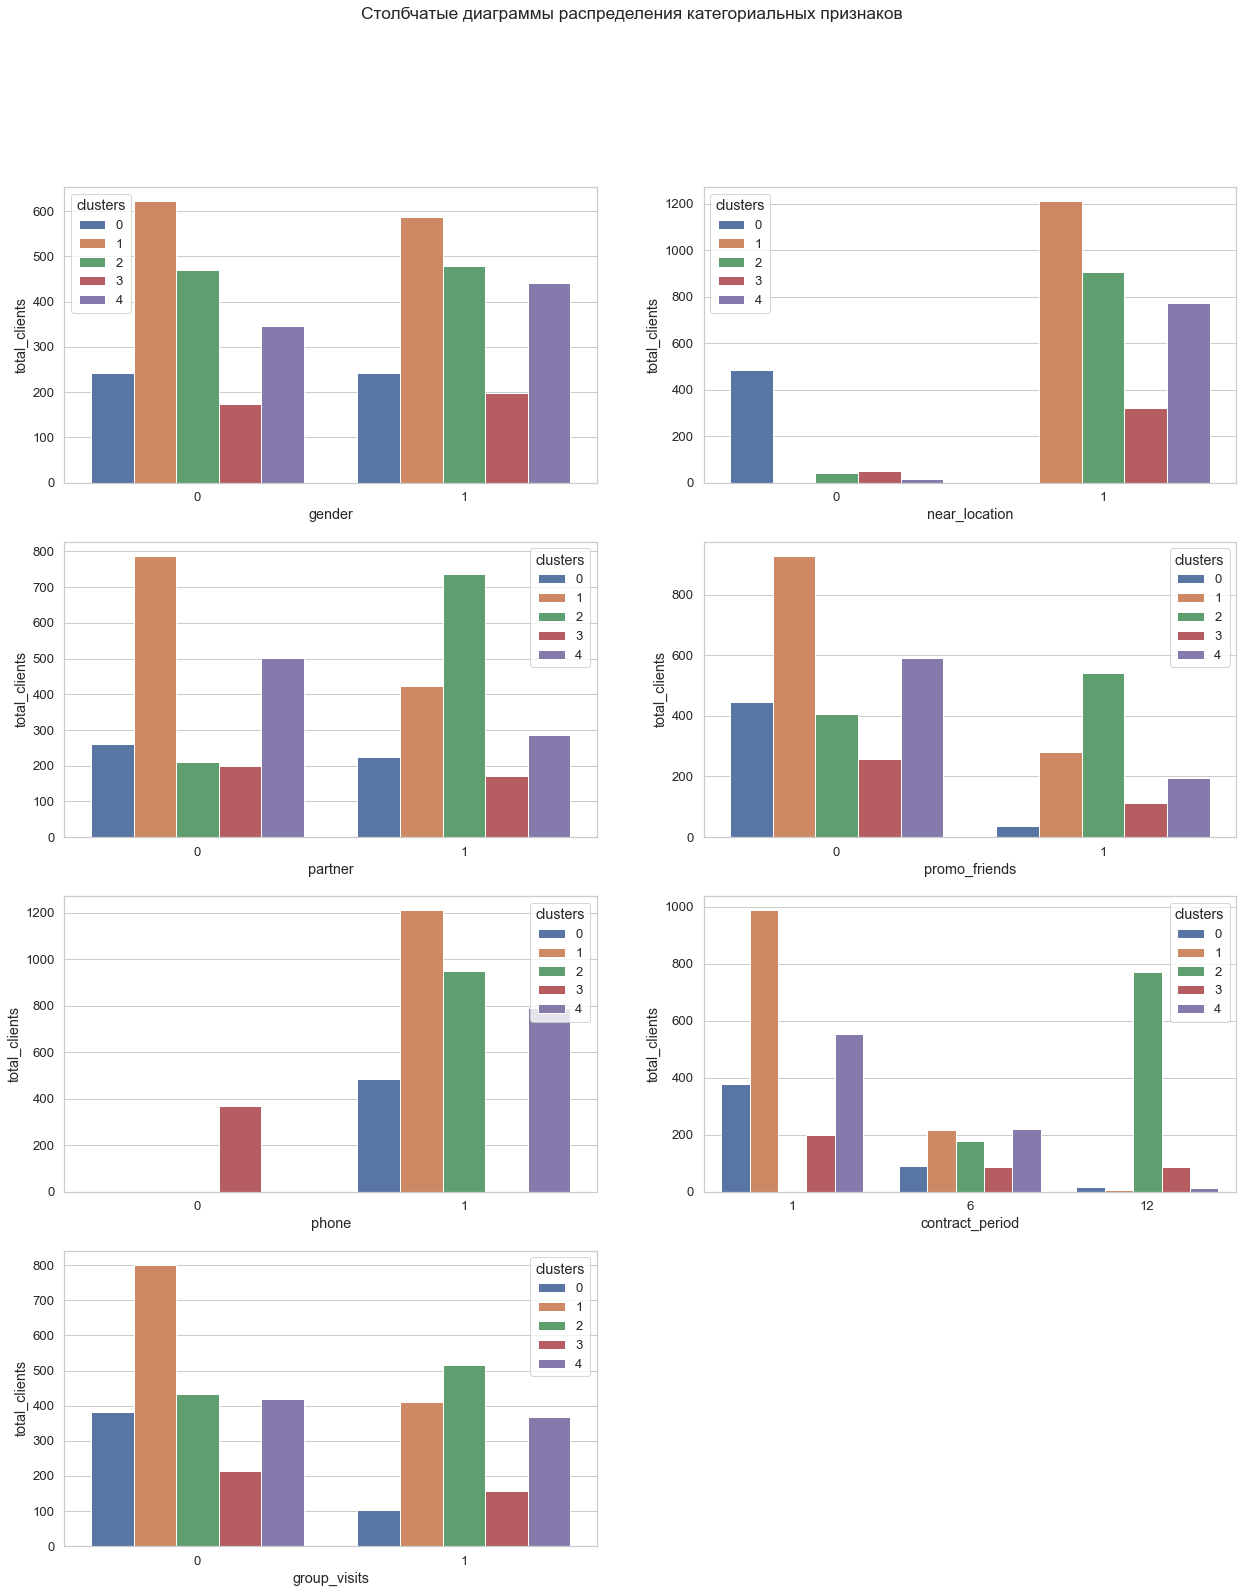

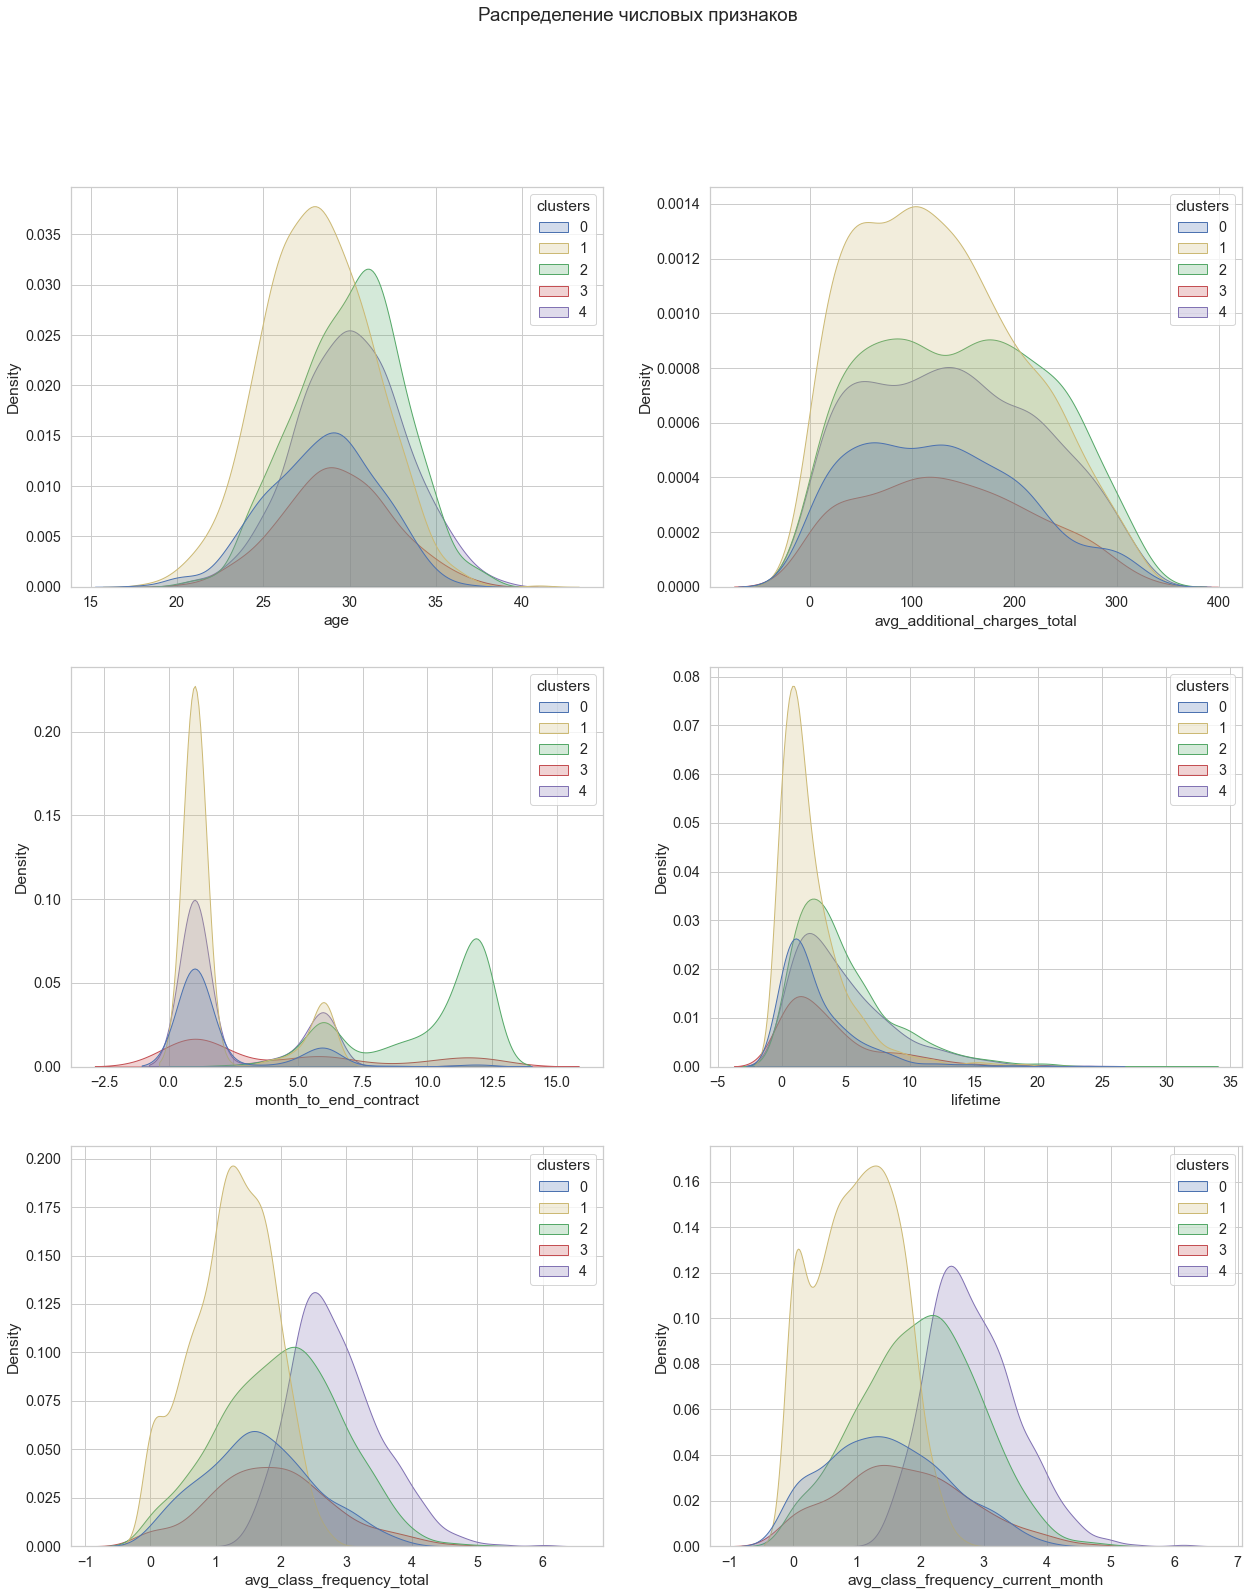

In [29]:
# Строим соответствующие графики для категориальных признаков
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(21, 25))
plt.suptitle('Столбчатые диаграммы распределения категориальных признаков')
n = 1
for col in df.columns:
    if col in cat:
        plot = df.groupby([col, 'clusters'], as_index=False).agg({'age':'count'})
        plot.rename(columns={'age':'total_clients'}, inplace=True)
        plt.subplot(4, 2, n)
        sns.barplot(data=plot, x=col, y='total_clients', hue='clusters')
        n += 1
plt.show()
print()
# Строим соответствующие графики для числовых признаков
sns.set(style='whitegrid', font_scale=1.3)
plt.figure(figsize=(21, 25))
plt.suptitle('Распределение числовых признаков')
n = 1
for col in df.columns[:-2]:
    if col not in cat:
        sns.set(style='whitegrid', font_scale=1.3)
        sns.set_palette("deep")
        plt.subplot(3, 2, n)
        sns.kdeplot(data=df, x=col, hue='clusters', palette=({0:'b', 1:'y', 2:'g', 3:'r', 4:'m'}), shade=True)
        n +=1
plt.show()

На основании графиков каждому кластеру можно дать соответствующую характеристику:

* **Кластер 3** - клиенты, которые не оставили контактный номер, со средней длительностью текущего абонемента и временем с момента первого обращения;


* **Кластер 1** - клиенты, живущие рядом с фитнес-центром, с наименьшей длительностью текущего абонемента, частотой посещения в неделю и временем с момента первого обращения; 


* **Кластер 0** - клиенты, живущие далеко, не участвовавшие в акции «приведи друга», не посещавшие групповые занятия, с небольшой лительностью текущего абонемента, частотой посещения в неделю и временем с момента первого обращения;


* **Кластер 2** - преимущественно живущие рядом сотрудники компаний-партнёров клуба, которые активнее всего пользовались акцией "приведи друга", посещали групповые занатия, и вообще, с наилучшими показателями по всем показателям, кроме лайфтайма и частоты посещений занятий в неделю (здесь они вторые); 


* **Кластер 4** - преимущественно живущие рядом клиенты с непродолжительным текущим абонементом, но с лучшими показателями лайфтайма и частоты посещений занятий в неделю

Также для каждого полученного кластера расчитаем долю оттока и визулизириуем ее

In [30]:
clusters_churn = (df.groupby('clusters', as_index=False)
                    .agg({'churn':'mean'})
                    .sort_values(by='churn'))
clusters_churn

,clusters,churn
2,2,0.029536
4,4,0.079949
3,3,0.278378
0,0,0.460744
1,1,0.526446


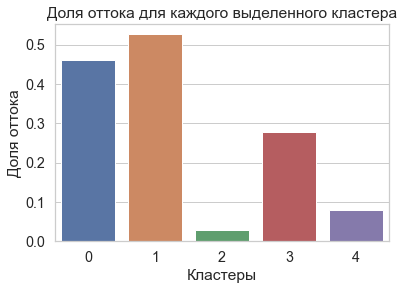

In [31]:
sns.barplot(data=clusters_churn, x='clusters', y='churn')
plt.title('Доля оттока для каждого выделенного кластера')
plt.xlabel('Кластеры')
plt.ylabel('Доля оттока');

Самые проблемные, с точки зрения оттока, кластеры - второй и четвертый. Напротив, самые устойчивые - первый и нулевой. Кластер "3" занимает срединное положение - в нем к оттоку сколнны чуть более четверти пользователей. 

## Вывод

[К содержанию](#begining)

* В результате выполнения данного шага была произведена сегментация клиентов фитнес-центра на 5 групп, а также  расчитана доля оттока в каждом из этих кластеров отдельно. 


* В итоге **наибольший уровень оттока** наблюдается в кластере 1 - это клиенты, **живущие рядом с фитнес-центром, но с наименьшей длительностью текущего абонемента, частотой посещения в неделю и временем с момента первого обращения**


* **Наименьший** в кластере 2  - среди клиентов, **преимущественно живущих рядом, сотрудников компаний-партнёров клуба, которые активнее всего пользовались акцией "приведи друга", посещали групповые занатия, и вообще, с наилучшими показателями по всем показателям, кроме лайфтайма и частоты посещений занятий в неделю (здесь они вторые)**.

# Итоги исследования

[К содержанию](#begining)

Работа над данным исследованием включала в себя последовательное выполнение следующих задач.


На **первом этапе** в ходе обзора и предварительной обработки  в данных не были обнаружены серьезные проблемы. Пропуски и дубликаты нотсутствуют, категориальные переменные уже преобразованы в числовые значения. Была проведена работы с выбросами, по итогам которой из датафрейма были удалены 5% самых экстремальных значений, помимо этого названия столбцов приведены к нижнему регистру.


**Второй этап** включал в себя исследовательский анализ данных, по итогам которого были выдвинуты следующие предположения:

* пол клиента и наличие контактного телефона не влияет на вероятность оттока;
* среди тех, кто ушел, чуть большее количество тех, кто жил далеко от фитнес центра;
* если клиент - сотрудник компании-партнёра клуба или же использовал промо-код от знакомого при оплате первого абонемента, то это несколько снижает вероятность оттока;
* чем больше длительность текущего действующего абонемента - тем менее вероятен уход клиента;
* посещение групповых занятий повышает вероятность того, что клиент отсанется с нами;
* средний возраст ушедших клиентов несколько ниже, чем тех, кто остался;
* ушедшие клиенты реже тратили деньги на прочие услуги фитнес центра;
* клиенты чаще уходят, когда срок действия их абонимента подходит к концу;
* в целом, чем дольше с нами клиент, тем меньше вероятность его ухода;
* чем чаще клиент посещает фитнес центр, тем менее вероятен его уход.

При этом согласно матрице корреляций, отток клиентов лучше всего коррелирует со следующими признаками - 
`lifetime`, `age`, `avg_class_frequency_current_month`, `month_to_end_contract`, `contract_period`.

В ходе **третьего этапа** двумя способами была обучена модель прогнозирования оттока клиентов.  Лучше всего показала себя модель логистической регрессии. Именно у нее лучше ключевая для нас метрика - recall.


На основании данной модели была сформирована таблица весов признаков, которая показала, что наибольшее влияние на сохранение/отток клиентов оказывают следующие признаки:

* средняя частота посещений в неделю за предыдущий месяц;
* время с момента первого обращения в фитнес-центр;
* средняя частота посещений в неделю за все время;
* возраст;
* длительность абонемента;
* расходы на доп. услуги;
* посещение групповых занятий.


По итогам **четвертого этапа** была произведена сегментация клиентов фитнес-центра на 5 групп, а также  расчитана доля оттока в каждом из этих кластеров отдельно. 


* В итоге **наибольший уровень оттока** наблюдается в кластере 1 - это клиенты, **живущие рядом с фитнес-центром, но с наименьшей длительностью текущего абонемента, частотой посещения в неделю, временем с момента первого обращения и доп. расходами в клубе**, 


* и в кластере 0 - среди клиентов, **живущих далеко, не участвовавших в акции «приведи друга», не посещавшие групповые занятия, с небольшой длительностью текущего абонемента, частотой посещения в неделю и временем с момента первого обращения**.


* **Наименьший** в кластере 2  - среди клиентов, **преимущественно живущих рядом, сотрудников компаний-партнёров клуба, которые активнее всего пользовались акцией "приведи друга", посещали групповые занатия, и вообще, с наилучшими показателями по всем показателям, кроме лайфтайма и частоты посещений занятий в неделю (здесь они вторые)**.

# Общие выводы и  базовые рекомендации по работе с клиентами

[К содержанию](#begining)

Исследование показало, что наибольший вклад с сохранение/отток клиентов вносят 

* частота посещений в неделю; 
* лайфтайм; 
* возраст (два сегмента с наибольший оттоком в среднем моложе других);
* длительность абонемента;
* посещение групповых занятий;
* приобретение доп. услуг в фитнес-центре.

Также на примере 2 кластера, негативное влияние способно оказывает расстояние от дома до фитнес-клуба

С учетом этого, можно рекомендовать следующее:

* стимулирование приобретения клиентами абонементов с более длительным сроком действия, возможно введение новых, более продолжительных абонементов (3, 9, 18, 24 месяца);


* активнее использовать каналы продвижения, привлекающие чуть более зрелых клиентов (~30 лет);


* чаще проводить групповые занятия (возможно со свободным посещением) - тем самым увеличится частота посещения занятий в неделю, помимо этого сам факт проведения подобных занятий также положительно влияет на уровень оттока клиентов;


* расширение перечня дополнительных услуг, предлагаемых фитнес-центром своим клиентам. 